# Reto 4

## Andrea Castiella Aguirrezabala y Miguel Eduardo Ortiz Huamani

## Imports

In [1]:
import numpy as np
import OurUtils as our
import cv2
from PIL import Image

# visualizacion
import matplotlib.pyplot as plt

# carga de datos
import pandas as pd
import os

# tensorflow
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

# tensorboard
from tensorboard import notebook

## Load data

In [2]:
class_names = ["aula", "cocina", "dormitorio", "oficina"]
data_path = "dataset"
train_im_names = [(os.listdir(os.path.join(data_path, label))) for label in class_names]
[train_im_names[i].sort(key= lambda x: (int(x[-3:]))) for i in range(len(train_im_names))]
train_im_names = np.hstack(np.array(train_im_names))
train_im_labels = np.array([class_names.index(name[:-3]) for name in train_im_names])
print(train_im_names, train_im_names.shape)
print(train_im_labels, train_im_labels.shape)

['aula001' 'aula002' 'aula003' ... 'oficina398' 'oficina399' 'oficina400'] (1600,)
[0 0 0 ... 3 3 3] (1600,)


In [3]:
test_size = .2
random_state = 123
X_train, Y_train, X_test, Y_test = our.single_stratified_split(train_im_names, train_im_labels, test_size=test_size, random_state=random_state)
print("Training set size: ", X_train.shape[0])
print("Validation set size: ", X_test.shape[0])
print("Example val")
print(X_test[0:5])
print(Y_test[0:5])
# print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
# print(np.where(Y_train==0)[0].shape)
# print(np.where(Y_train==1)[0].shape)
# print(np.where(Y_train==2)[0].shape)
# print(np.where(Y_train==3)[0].shape)
# print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
# print(np.where(Y_test==0)[0].shape)
# print(np.where(Y_test==1)[0].shape)
# print(np.where(Y_test==2)[0].shape)
# print(np.where(Y_test==3)[0].shape)

Training set size:  1280
Validation set size:  320
Example val
['oficina139' 'aula112' 'aula272' 'dormitorio354' 'dormitorio228']
[3 0 0 2 2]


In [4]:
X_train = [np.array(Image.open(os.path.join(data_path, name[:-3], name))) for name in X_train]
X_test = [np.array(Image.open(os.path.join(data_path, name[:-3], name))) for name in X_test]

## Image shape differences
- define input size of the model

In [22]:
h = []
w = []
for i in range(len(X_train)):
    im_shape = X_train[i].shape
    h.append(im_shape[0])
    w.append(im_shape[1])

h = np.array(h)
w = np.array(w)
print("h: ", np.unique(h), np.mean(h))
print("w: ", np.unique(w), np.mean(w))

h:  [ 72  92  98 103 104 107 108 109 110 120 126 129 131 132 133 134 135 136
 137 139 140 141 142 144 147 148 149 150] 148.90625
w:  [ 72  92 120 150 180 239 240] 154.55078125


## Visualize data

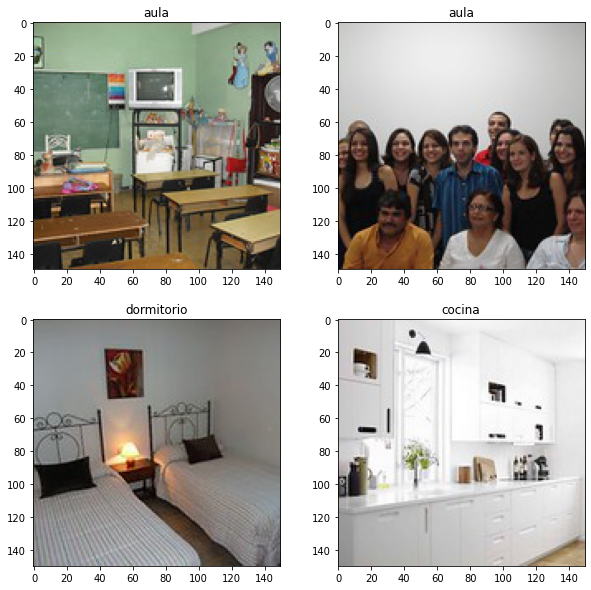

In [5]:
plt.figure(figsize=(10,10))

n_img = np.random.randint(0, len(X_train))
img_in = X_train[n_img]
img_label = Y_train[n_img]
ax1 = plt.subplot(2,2,1)
ax1.title.set_text(class_names[img_label])
plt.imshow(img_in)

n_img = np.random.randint(0, len(X_train))
img_in = X_train[n_img]
img_label = Y_train[n_img]
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text(class_names[img_label])
plt.imshow(img_in)

n_img = np.random.randint(0, len(X_train))
img_in = X_train[n_img]
img_label = Y_train[n_img]
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text(class_names[img_label])
plt.imshow(img_in)

n_img = np.random.randint(0, len(X_train))
img_in = X_train[n_img]
img_label = Y_train[n_img]
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text(class_names[img_label])
plt.imshow(img_in)

plt.show()

## Process data

In [19]:
print(type(X_train), len(X_train), X_train[0].shape)
mm = X_train[:2]
print(type(mm), len(mm), mm[0].shape, mm[1].shape)
kk = np.array(mm)
print(kk.shape)

<class 'list'> 1280 (150, 150, 3)
<class 'list'> 2 (150, 150, 3) (150, 150, 3)
(2, 150, 150, 3)


In [ ]:
# normalize
# resize
# data augmentation (?)
# dimensions

## Model

## Trainer
- tensorboard
- optimizer
- loss function
- metrics

## Trainer
- fit

In [ ]:
EPOCHS = 10
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, Y_train)).shuffle(64).batch(16)


test_ds = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).shuffle(16).batch(16)

## Quantitative results
- accuracy

## Qualitative Results